In [12]:
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import pandas as pd

In [13]:
sys.path.insert(0, os.path.abspath('../'))
from Kernel.SubsequenceStringKernel import SubsequenceStringKernel
import Util.Util as Util
import Constant as C
import Util.MetricsUtil as metric
import Model.SVMModel as SVMModel

In [14]:
importlib.reload(Util)
importlib.reload(metric)
importlib.reload(C)
importlib.reload(SVMModel)

<module 'Model.SVMModel' from '/Users/pradeep/Files/ML/StringKernel/Model/SVMModel.py'>

In [15]:
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

In [16]:
for key in C.cases:
    print(key,": ",C.cases[key][0],"vs",C.cases[key][1],"\n")

case_name = "case9"
purpose="input"
m_lambda = C.m_lambda
n = C.N

case1 :  Trump vs Erdoğan 

case2 :  Trump vs Shakespeare 

case3 :  None vs None 

case4 :  Trump vs Biden 

case5 :  Trump vs Macron 

case6 :  Shakespeare vs Bible 

case7 :  Democrats vs Republican 

case8 :  Biden vs Bible 

case9 :  Trump vs Johnson 



In [17]:
def get_data(case_name, purpose, i):
    if purpose == "test":
        return Util.get_data_test(case_name, purpose, i)
    else:
        return Util.get_data(case_name, purpose)

In [18]:
def get_distance_graph(purpose):
    frames=[]
    for i in [0]:
        x,y = get_data(case_name, purpose, i)
#         f1_1,f1_2 = metric.get_distance_f1_score(case_name, purpose)
        distance,y_predict = metric.get_distance_predict(case_name,purpose)
    
        frames.append(pd.DataFrame({'testing': [i]*len(distance), 'distance': distance,'predict': np.where(y!=y_predict,"Error" , "Correct")}))
        
        print(distance[y!=y_predict])
        print(x[y!=y_predict],Util.get_status(case_name,y_predict[y!=y_predict]))
        print("\n\n")
#     print(Util.print_reports_send(case_name,y,y_predict,"", "", ""))

    
    fig, ax = plt.subplots()
    annot = ax.annotate(C.cases[case_name][1], xy=(3,0.5), xytext=(20,20),textcoords="offset points",horizontalalignment='left',
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
    ax.annotate(C.cases[case_name][0], xy=(3,-0.5), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),horizontalalignment='left', verticalalignment='top',
                    arrowprops=dict(arrowstyle="->"))
    sc = sns.scatterplot(data=pd.concat(frames), x="testing", y="distance",hue="predict",style="predict")
    plt.legend(loc='upper left')
    point1 = [0, 0]
    point2 = [4, 0]
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'k--')
#     fig.savefig(case_name+".png", dpi=100)
#     plt.figure(figsize=(20,10))


[ 0.09948108  0.53694852  0.13052793  0.17916514  0.31578819  0.04309652
  0.32035261  0.3649879   0.41161075  0.06397636  0.03791696  0.01466675
 -0.27711306 -0.40969568]
[['Today, it was my great honor to nominate one of our nation’s most brilliant and gifted legal minds to the Supreme Court. She is a woman of unparalleled achievement, towering intellect, sterling credentials, and unyielding loyalty to the Constitution: Judge Amy Coney Barrett... https://t.co/l2yezt2UOi\n']
 ['Under The America First Healthcare Plan, we will ensure the highest standard of care anywhere in the world — cutting-edge treatments, state-of-the-art medicine, groundbreaking cures, and true health security for you and your loved ones! https://t.co/H64XPD183Y\n']
 ['Praying for the two police officers that were shot tonight in Louisville, Kentucky. The Federal Government stands behind you and is ready to help. Spoke to @GovAndyBeshear and we are prepared to work together, immediately upon request!\n']
 ['We th

<IPython.core.display.Javascript object>


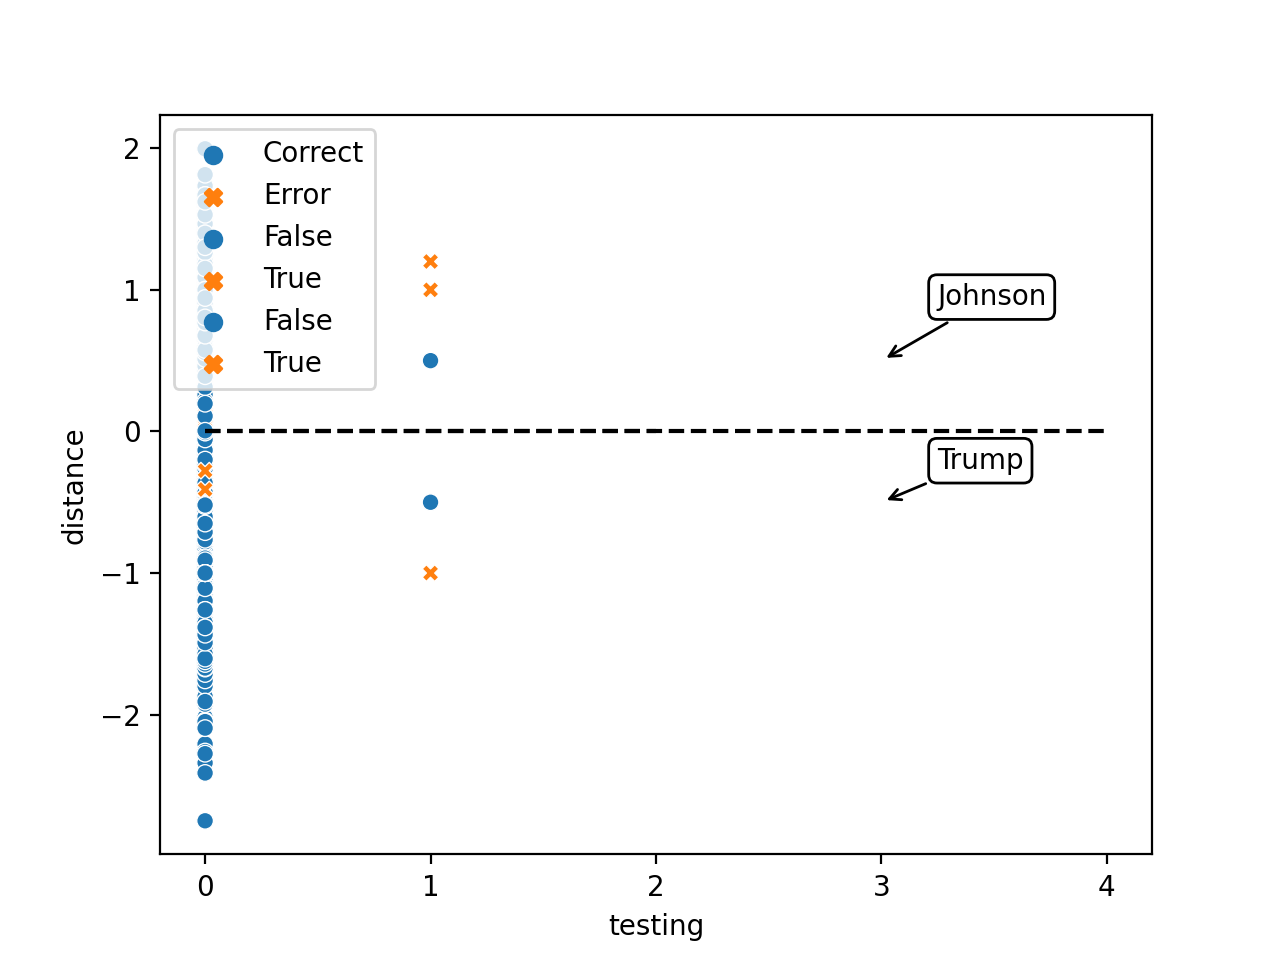

In [19]:
get_distance_graph(purpose)

In [9]:
frames=[]
for i in range(5):
    frames.append(pd.DataFrame(metric.get_metrics_data(case_name,purpose)))

data = pd.concat(frames)
data
row1 = "\multirow{2}{*}{1}  & Trump Tweet (500) & $18^{th}$ Aug - $14^{th}$ Aug &  "
row2 = "\n                     & Boris Tweet (500) & $18^{th}$ Aug - $14^{th}$ Aug  &  "

In [10]:
data

""


In [11]:
data1 = (row1+data['precision1'].astype(str)+"    &   "+data['recall1'].astype(str)+"    & "+data['f1_1'].astype(str)+"   \\\\")

KeyError: 'precision1'

In [ ]:
data2 = row2+data['precision2'].astype(str)+"    &   "+data['recall2'].astype(str)+"    & "+data['f1_2'].astype(str)+"   \\\\"

In [ ]:
(data1[0:1]+data2[0:1]).to_clipboard(index=False,header=False)

In [ ]:
(data1[1:2]+data2[1:2]).to_clipboard(index=False,header=False)

In [ ]:
(data1[2:3]+data2[2:3]).to_clipboard(index=False,header=False)

In [ ]:
(data1[3:4]+data2[3:4]).to_clipboard(index=False,header=False)

In [ ]:
(data1[4:5]+data2[4:5]).to_clipboard(index=False,header=False)

<IPython.core.display.Javascript object>


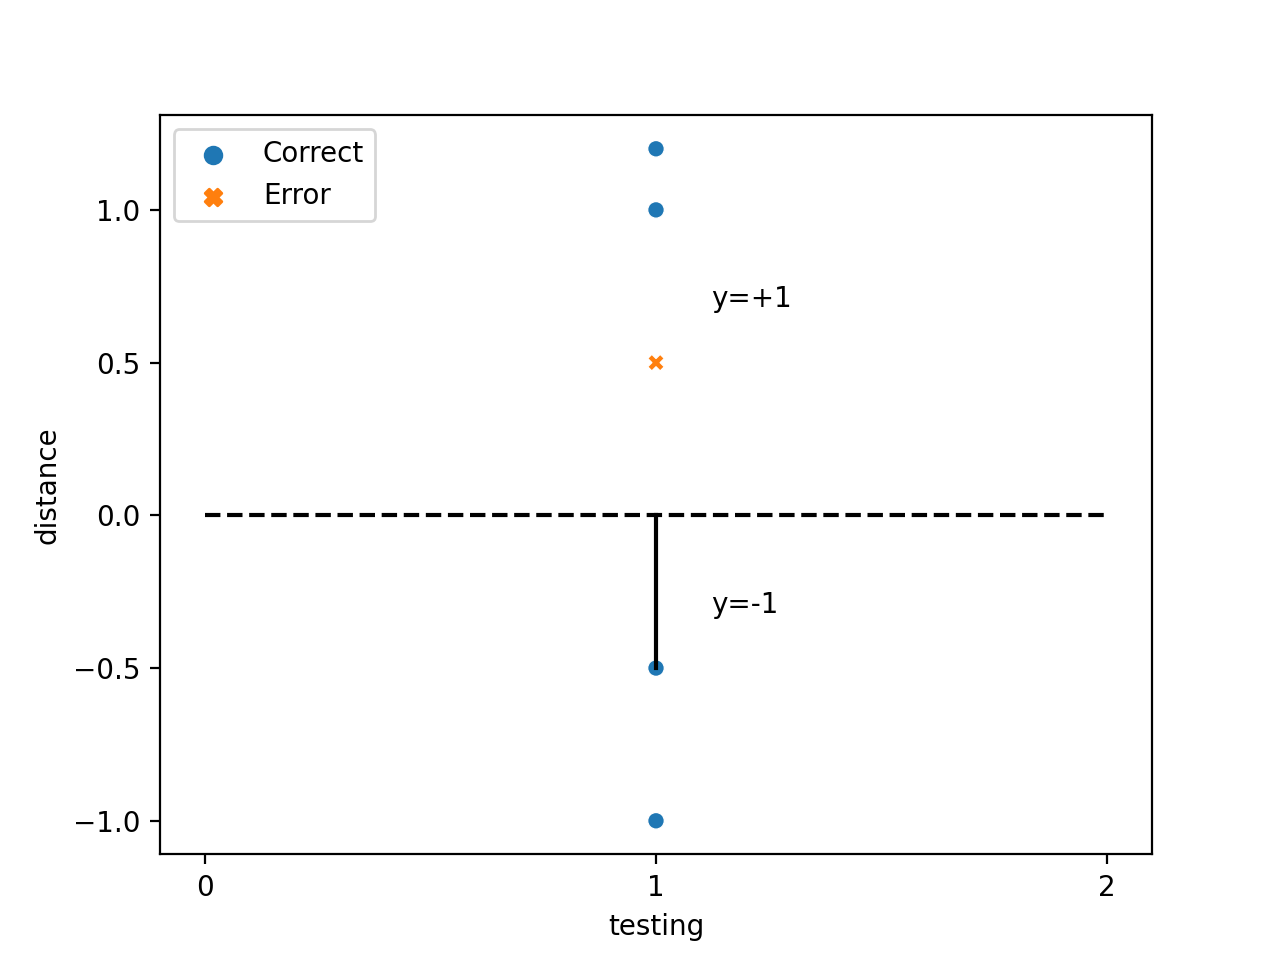

In [112]:
frames=[]
distance = [1,1.2,-1,-0.5,0.5]
distance_p = [1,1.2,-1,-0.5,-0.5]
predict = ["Correct","Correct","Correct","Correct","Error"]

for i in range(5):
    frames.append([1,distance[i],predict[i]])
data = pd.DataFrame(frames,columns=['testing', 'distance', 'predict'])
fig, ax = plt.subplots()
annot = ax.annotate("y=+1", xy=(1,0.5), xytext=(20,20),textcoords="offset points")
#                     ,horizontalalignment='left',
#                     bbox=dict(boxstyle="round", fc="w"),
#                     arrowprops=dict(arrowstyle="->"))
# ax.annotate("y=+1", xy=(1,-0.5), xytext=(20,20))
# #             ,textcoords="offset points",
# #                     bbox=dict(boxstyle="round", fc="w"),horizontalalignment='left', verticalalignment='top',
# #                     arrowprops=dict(arrowstyle="->"))
ax.annotate("y=-1", xy=(1,-0.5), xytext=(20,20),textcoords="offset points")

sc = sns.scatterplot(data=data, x="testing", y="distance",hue="predict",style="predict")
plt.legend(loc='upper left')
point1 = [0, 0]
point2 = [2, 0]
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, 'k--')
plt.plot([1,1], [-0.5,0], 'k-')